# 新一轮空值填充

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

In [15]:
train = pd.read_csv('datas/los_data.csv')

查看空值情况

In [16]:
def getNullCount():
    x = train.isnull().sum()
    print(x[x>0])
    x[x>0].sort_values().plot.bar()  

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


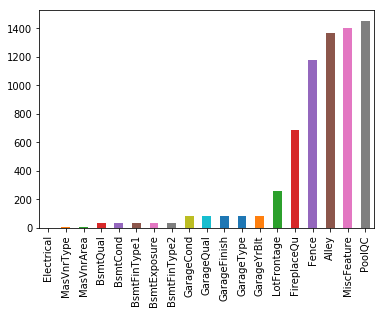

In [35]:
getNullCount()

## LotFrontage 填充

### 思路1：房子宽度，是否和小区有关？和小区设计有关？

取不同的Neighborhood的均值和中位数

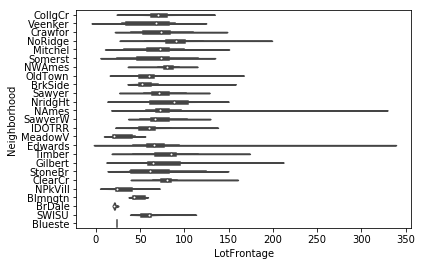

In [17]:
sns.violinplot('LotFrontage', 'Neighborhood', data=train)

In [31]:
# getNullCount()

In [27]:
neighborhood_group=train.groupby('Neighborhood')
lot_median=neighborhood_group['LotFrontage'].median()
lot_mean=neighborhood_group['LotFrontage'].mean()

In [32]:
# 对空值情况
# train[train['LotFrontage'].isnull()]['Neighborhood']

### 思路2：是否和LotArea 有关呢？

房子宽度 和 房屋面积(不缺失)


In [33]:
train['LotFrontage'].corr(train['LotArea'])

0.42609501877180833

In [34]:
train['LotFrontage'].corr(np.sqrt(train['LotArea']))

0.6020022167939361

In [36]:
# 添加1列
train['SqrtLotArea']=np.sqrt(train['LotArea'])

In [37]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242


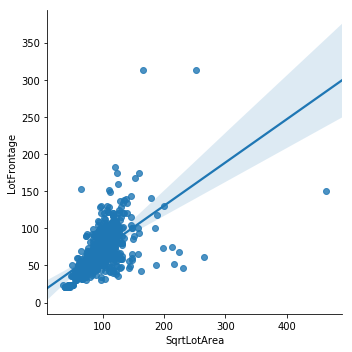

In [38]:
# 相关度较大
# 拟合的曲线 y = 0.6 * x
sns.lmplot('SqrtLotArea','LotFrontage', data=train)

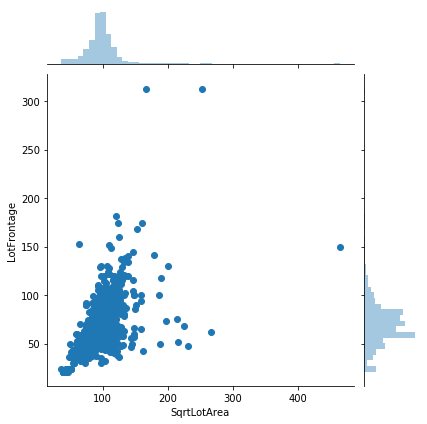

In [39]:
sns.jointplot('SqrtLotArea', 'LotFrontage', data=train)

In [40]:
# 把空值拿出来
filter = train['LotFrontage'].isnull()
train.LotFrontage[filter] = 0.6 * train.SqrtLotArea[filter]

In [42]:
train['LotFrontage'].isnull().sum()

0

<br><br>

## MasVnrType 和 MasVnrArea的填充

砖石镶板种类

In [ ]:
plt.scatter(train['MasVnrArea'], train['SalePrice'])

In [ ]:
sns.plot(train['MasVnrArea'], train['SalePrice'])

In [ ]:
train['MasVnrArea'].corr(train['SalePrice'])

In [ ]:
train['MasVnrType'].corr(train['SalePrice'])

In [ ]:
sns.boxplot('MasVnrArea', 'SalePrice', data=train)

In [ ]:
sns.boxplot('MasVnrType', 'SalePrice', data=train)

In [ ]:
train.groupby(['MasVnrType']).count()

In [ ]:
train[train.MasVnrType=='None'][['MasVnrType', 'MasVnrArea']].head()

In [ ]:
# 有回归
sns.lmplot('MasVnrArea', 'SalePrice', hue='MasVnrType', data=train)

In [ ]:
filter=train['MasVnrArea'].isnull()

In [ ]:
train.MasVnrArea[filter]=0.0

In [ ]:
filter=train['MasVnrType'].isnull()
train.MasVnrType[filter]='None'

后续在EDA的特征工程中，可以使用如下填充办法：
1. 分类进行预测MasVnrType，使用回归MasVnrAre



Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


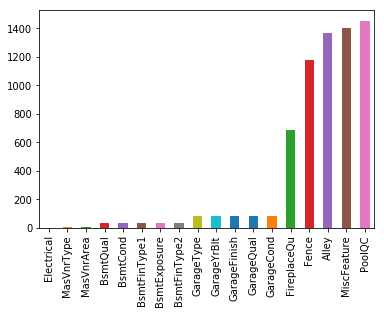

In [45]:
getNullCount()

## 3. Electrical的填充

In [ ]:
# 先看和目标的相关性
sns.boxplot('Electrical', 'SalePrice', data=train)

In [ ]:
train.groupby('Electrical').count()

In [ ]:
filter=train['Electrical'].isnull()
train.Electrical[filter]='SBrkr'

In [ ]:
getNullCount()

## 4. Alley 的填充

EDA 后半段考虑删掉

80%以上的空值，可以删除了

In [ ]:
train['Alley'].value_counts()

In [ ]:
# train['Alley'].sort_values()
train['Alley'].value_counts()
# train['Alley'].value_counts() 与groupby().count()效果一样？

In [ ]:
sns.stripplot('Alley', 'SalePrice', data=train)

In [ ]:
train['Alley']=train['Alley'].fillna('None')

In [ ]:
getNullCount()

## BaseMent 群填充
完整的关于Basement的类

分析重要性



In [ ]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

In [ ]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
print(train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True])

In [ ]:
train[train.BsmtCond=='NA']

In [ ]:
for col in basement_cols:
    if 'FinSF' not in col:
        train[col]=train[col].fillna('None')

In [ ]:
getNullCount()

## FireplaceQu填充

火炉

In [ ]:
sns.lmplot('Fireplaces', 'SalePrice', data=train)

In [ ]:
sns.lmplot('Fireplaces', 'SalePrice', data=train, hue='FireplaceQu')

In [ ]:
train['FireplaceQu']=train['FireplaceQu'].fillna('None')

In [ ]:
getNullCount()

## Carage 列群填充

In [ ]:
sns.lmplot('GarageArea', 'SalePrice', data=train)

In [ ]:
# 分布，拟正太分布
sns.distplot(train['GarageArea'], color='y', kde=True)

In [ ]:
sns.violinplot(train['GarageCars'], train['SalePrice'])

In [ ]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']

In [ ]:
train[garage_cols][train['GarageType'].isnull()].head()
# print(train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True])

In [ ]:
for col in garage_cols:
    if train[col].dtype==np.object:
        train[col]=train[col].fillna('None')
    else:
        train[col]=train[col].fillna(0)

In [ ]:
getNullCount()

In [ ]:
sns.distplot(train['PoolArea'], color='g', kde=True)

In [ ]:
train.PoolQC=train['PoolQC'].fillna('None')

In [9]:
getNullCount()

NameError: name 'getNullCount' is not defined

In [ ]:
train.LotFrontage = 

## Fence填充

In [ ]:
sns.violinplot(train['Fence'], train['SalePrice'])

总共有5个类型，然而可以统计出来的类型以后在那个只有4类



In [ ]:
train.Fence = train['Fence'].fillna('None')

In [ ]:
# 回看填充后的数据 与 SalePrice的关系
sns.violinplot(train['Fence'], train['SalePrice'])

In [ ]:
getNullCount()

## MiscFeature填充

In [ ]:
sns.violinplot(train['MiscFeature'], train['SalePrice'])

因为MiscFeature本来有5类，因此可以断定

In [ ]:
train.MiscFeature = train['MiscFeature'].fillna('None')

In [ ]:
getNullCount()

In [ ]:
train['SqrtLotArea']=np.sqrt(train['LotArea'])

In [ ]:
filter=train['LotFrontage'].isnull()
train.LotFrontage[filter]=0.6*train.SqrtLotArea[filter]

In [ ]:
filter=train['LotFrontage'].isnull()
filter.sum()

In [ ]:
getNullCount()